# Predictive Segmentation Project and Proof of Concept

## By Jyothi P Samudrala

# Checking file paths and loading data

In [1]:
# Checking data files

import os
for dirname, _, filenames in os.walk('Y:\myprojects_gitbacked\predictivesegmentation_dataset'):
    print(filenames)
    for filename in filenames:
        print(os.path.join(dirname, filename))

['sample_submission.csv', 'Test.csv', 'Train.csv']
Y:\myprojects_gitbacked\predictivesegmentation_dataset\sample_submission.csv
Y:\myprojects_gitbacked\predictivesegmentation_dataset\Test.csv
Y:\myprojects_gitbacked\predictivesegmentation_dataset\Train.csv


In [2]:
# loading data

import pandas as pd

train_data=pd.read_csv("Y:\myprojects_gitbacked\predictivesegmentation_dataset\Train.csv")
test_data=pd.read_csv("Y:\myprojects_gitbacked\predictivesegmentation_dataset\Test.csv")
submission = pd.read_csv("Y:\myprojects_gitbacked\predictivesegmentation_dataset\sample_submission.csv") # this is a sample data for submission

# Exploratory Data Analysis- Understanding the data

In [3]:
# Viewing datatype,column and row count

def data_information(data):
    data.info()
    print()

data_information(train_data)
data_information(test_data)
data_information(submission)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-

In [4]:
# View head and tail
import warnings
warnings.filterwarnings('ignore')

def show_head_tail(data, head_rows, tail_rows):
    display(data.head(head_rows).append(data.tail(tail_rows)))

print("Train dataset head/tail...")
show_head_tail(train_data,3,3)
print("Test dataset head/tail...")
show_head_tail(test_data,3,3)
print("Submission dataset head/tail...")
show_head_tail(submission,3,3)



Train dataset head/tail...


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


Test dataset head/tail...


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7


Submission dataset head/tail...


,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
2624,467960,A
2625,467961,A
2626,467968,A


In [5]:
# data description

data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]

def display_data_description(data, numeric_data_types, categorical_data_types):
    
    print("Data Description :")
    display(data.describe( include = numeric_data_types))
    print("")
    display(data.describe( include = categorical_data_types))

print("Train Data")
display_data_description(train_data, data_types[0:4], data_types[4:7])


Train Data
Data Description :


,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [6]:
print("Test Data")
display_data_description(test_data, data_types[0:4], data_types[4:7])


Test Data
Data Description :


,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1
count,2627,2577,2603,2589,2627,2595
unique,2,2,2,9,3,7
top,Male,Yes,Yes,Artist,Low,Cat_6
freq,1424,1520,1602,802,1616,1672


In [7]:
import numpy as np

# Percentage of non-unique values in Train data
print(np.intersect1d(train_data['ID'], test_data['ID']).shape[0]/train_data['ID'].nunique()*100)

28.90431333663857


In [8]:
# Are there customers in test data, that are also in the train data, how unique is test data?

common_ids = len(set(test_data['ID'].unique()).intersection(set(train_data['ID'].unique())))
print("Common IDs : ",common_ids)
print("Unique IDs : ",test_data.shape[0] - common_ids)


Common IDs :  2332
Unique IDs :  295


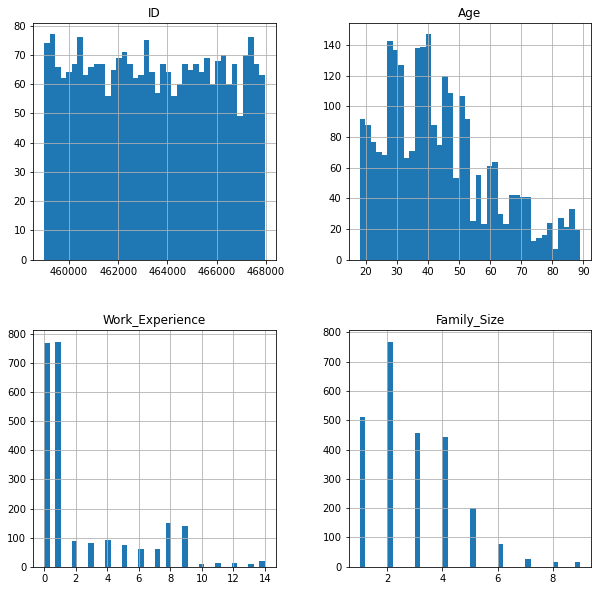

In [9]:
import matplotlib.pyplot as plt
import numpy as np
hist = test_data.hist(bins=40, figsize=(10,10))


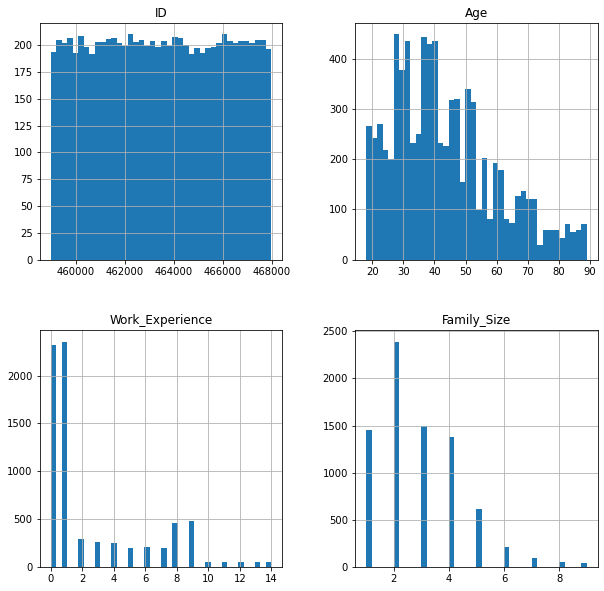

In [10]:
hist = train_data.hist(bins=40, figsize=(10,10))


In [11]:
# Merging train data with test data on id, removing unique elements from train in the merge

# We will use this increased data set in the end to submit our new "predicted" segments

testx = pd.merge(test_data,train_data,how='left', on = 'ID')



In [12]:
# testx.count()

In [13]:
# testx.head(5)

# Removing duplicates from data

In [14]:
def purge_duplicates(data):
    print("Before removing duplicates: ", data.shape[0])
    data.drop_duplicates(keep="first", inplace=True)
    print("After removing duplicates: ", data.shape[0])
    return data

In [15]:
train_data = purge_duplicates(train_data)

Before removing duplicates:  8068
After removing duplicates:  8068


In [16]:
test_data = purge_duplicates(test_data)

Before removing duplicates:  2627
After removing duplicates:  2627


# Filling in Missing Values

In [17]:
train_data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [18]:
test_data.isna().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [19]:
def fill_missing(data, fill_value, fill_types,columns, dataframe_name):
    print("Missing values before fill in: ", dataframe_name, " data")
    display(data.isnull().sum())
    for column in columns:
        #fill missing values with a specific value:
        if "Value_Fill" in fill_types:
            data[column] = data[column].fillna(fill_value)
            print("Value_Fill")
            
        # fill missing values with previous row value as current row in table
        if "Forward_Fill" in fill_types:
            data[column] = data[column].ffill(axis = 0)
            print("Forward_Fill")
        
        # fill missing values with next row value as current row in table
        if "Backward_Fill" in fill_types:
            data[column] = data[column].bfill(axis = 0)
            print("Backward_Fill")
            
        if "Median_Fill" in fill_types:
            data[column] = data[column].fillna(data[column].median())
            print("Median_Fill")
            
    print("Missing Values after fill in ",dataframe_name," data")
    display(data.isnull().sum())
    return data
            

In [20]:
# Filling in Categorical values with forward fill

categorical_columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]

def categorical_fill(fill_types, data):
    fill_value = 0
    for column in categorical_columns:
        print("Filling in", column)
        data = fill_missing(data, fill_value, fill_types, [column],"train")
    return None

categorical_fill("Forward_Fill", train_data)

Filling in Gender
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Forward_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Filling in Ever_Married
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Forward_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Filling in Graduated
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Forward_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Filling in Profession
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Forward_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Filling in Spending_Score
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Forward_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Filling in Var_1
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

Forward_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

In [21]:
# Filling in Numerical values with median
numerical_columns = ["Age", "Work_Experience", "Family_Size"]

def numerical_fill(fill_types, data):
    fill_value = 0
    for column in numerical_columns:
        print("Filling in", column)
        data = fill_missing(data, fill_value, fill_types, [column],"train")
    return None

numerical_fill("Median_Fill", train_data)


Filling in Age
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

Median_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

Filling in Work_Experience
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

Median_Fill
Missing Values after fill in  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

Filling in Family_Size
Missing values before fill in:  train  data


ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        335
Var_1                0
Segmentation         0
dtype: int64

Median_Fill
Missing Values after fill in  train  data


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

# Feature Engineering and Splitting Train Data into Train and Validation Data with Predictors and Target

In [22]:
# Concatenate train and test data into single DataFrame - df :

train_data['is_train'] = 1
test_data['is_train'] = 0
df = pd.concat([train_data,test_data])

In [23]:
# Convert Categorical(String) Columns using Label Encode Technique :
# Label encode category values

from sklearn.preprocessing import LabelEncoder

for i in categorical_columns:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype('str'))

In [24]:
# Mapping Values to Label ENCODED Values :

df['Segmentation'] = df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})


In [25]:
# Get Back train data from df with a condition on column is_train == 1 :

train_data = df[df['is_train'] == 1]

In [26]:
train_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train
0,462809,1,0,22,0,5,1.0,2,4.0,3,3.0,1
1,462643,0,1,38,1,2,1.0,0,3.0,3,0.0,1
2,466315,0,1,67,1,2,1.0,2,1.0,5,1.0,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1.0,1
4,462669,0,1,40,1,3,1.0,1,6.0,5,0.0,1


In [27]:
# split train into 5 folds and apply random forest and check accuracy of each fold

predictor_train_data = train_data.drop(['Segmentation','is_train','ID'],axis=1)
target_train_data    = train_data['Segmentation']
predictor_test_data = test_data.drop(['is_train','ID'],axis=1)

In [28]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    
    if encoding_strategy == "LabelEncoding":
        Encoder = LabelEncoder()
        for column in encoding_columns :
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
            
    # presently don't have one hot encoding or target encoding
    
    return encoding_data

encoding_columns  = [ "Gender", "Ever_Married" , "Graduated", "Profession" , "Spending_Score", "Var_1" ]
encoding_strategy = [ "OneHotEncoding", "LabelEncoding", "TargetEncoding", "ELSE"]

predictor_train_encode = data_encoding( encoding_strategy[1] , predictor_train_data , encoding_columns )
predictor_test_encode  = data_encoding( encoding_strategy[1] , predictor_test_data ,  encoding_columns )

In [29]:
print("predictor_train_encode SHAPE   : ",predictor_train_encode.shape)
display("predictor_train_encode COLUMNS : ",predictor_train_encode.head())

print("predictor_test_encode SHAPE   : ",predictor_test_encode.shape)
display("predictor_test_encode COLUMNS : ",predictor_test_encode.head())

predictor_train_encode SHAPE   :  (8068, 9)


'predictor_train_encode COLUMNS : '

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,1.0,0,3.0,3
2,0,1,67,1,2,1.0,2,1.0,5
3,1,1,67,1,7,0.0,1,2.0,5
4,0,1,40,1,3,1.0,1,6.0,5


predictor_test_encode SHAPE   :  (2627, 9)


'predictor_test_encode COLUMNS : '

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
2,0,1,69,0,9,0.0,2,1.0,5
3,1,1,59,0,4,11.0,1,2.0,5
4,0,0,19,0,8,NaN,2,4.0,5


# Create Baseline Machine Learning Model

In [30]:
# Garbage Collection Libraries :

import gc

# Boosting Algorithm Libraries :

from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import RandomForestClassifier, VotingClassifier
from sklearn.metrics                  import accuracy_score
from sklearn.model_selection          import StratifiedKFold,KFold

In [31]:
# Creating baseline model

lgb_model = LGBMClassifier()

In [32]:
# Apply Stratified K-Fold Cross Validation where K=5 or n_splits=5 :
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
acc = []
categorical_features = ["Gender", "Ever_Married" ,"Graduated" ,"Profession" ,"Spending_Score" ,"Var_1" ]

In [33]:
# Pass predictor_train,target_train for Cross Validation :
for fold,(t_id,v_id) in enumerate(kf.split(predictor_train_data,target_train_data)):
    
    # Split train and validation data :
    tx = predictor_train_data.iloc[t_id]; ty = target_train_data.iloc[t_id]
    vx = predictor_train_data.iloc[v_id]; vy = target_train_data.iloc[v_id]
    
    # Train/Fit the Data to LighGBM Model :
    lgb_model.fit(tx,ty, categorical_feature = categorical_features )
    
    # Predict the Validation Data to Train LighGBM Model :
    val_y = lgb_model.predict(vx)
    
    # Get Accuracy Score on Validation Data for Each Fold :
    acc_score = accuracy_score(vy,val_y)
    acc.append(acc_score)
    print(f"fold {fold} accuracy {acc_score}")

# Get Mean of Accuracy Score on Validation Data for All 5 Folds :
print(f"Mean accuracy score {np.mean(acc)}")

fold 0 accuracy 0.5154894671623296
fold 1 accuracy 0.5384138785625775
fold 2 accuracy 0.5285006195786865
fold 3 accuracy 0.5071295722256665
fold 4 accuracy 0.5449473031618103
Mean accuracy score 0.526896168138214


# Attempts to Improve Machine Learning Model

In [34]:
# Tuned the Hyperparameters of LighGBM Classifier :
lgb_model = LGBMClassifier(
                                   boosting_type='gbdt', 
                                   max_depth=15, 
                                   learning_rate=0.15, 
                                   objective='multiclass', # Multi Class Classification
                                   random_state=100,  
                                   n_estimators=1000 ,
                                   reg_alpha=0, 
                                   reg_lambda=1, 
                                   n_jobs=-1
                                 )

In [35]:
# Pass predictor_train,target_train for Cross Validation :
for fold,(t_id,v_id) in enumerate(kf.split(predictor_train_data,target_train_data)):
    
    # Split train and validation data :
    tx = predictor_train_data.iloc[t_id]; ty = target_train_data.iloc[t_id]
    vx = predictor_train_data.iloc[v_id]; vy = target_train_data.iloc[v_id]
    
    # Train/Fit the Data to LighGBM Model :
    lgb_model.fit(tx,ty, categorical_feature = categorical_features )
    
    # Predict the Validation Data to Train LighGBM Model :
    val_y = lgb_model.predict(vx)
    
    # Get Accuracy Score on Validation Data for Each Fold :
    acc_score = accuracy_score(vy,val_y)
    acc.append(acc_score)
    print(f"fold {fold} accuracy {acc_score}")

# Get Mean of Accuracy Score on Validation Data for All 5 Folds :
print(f"Mean accuracy score {np.mean(acc)}")

fold 0 accuracy 0.4801734820322181
fold 1 accuracy 0.4739776951672863
fold 2 accuracy 0.476456009913259
fold 3 accuracy 0.4550526968381897
fold 4 accuracy 0.4662120272783633
Mean accuracy score 0.49863527519203865


# Predict Target Segmentation - Final Results

In [36]:
def model_train_predict_submit( Classifiers_model_name, model_name ,X_train, y_train, X_test, target):
    
    categorical_features = ["Gender", "Ever_Married" ,"Graduated" ,"Profession" ,"Spending_Score" ,"Var_1"  ]
    Classifiers_model_name.fit( X_train, y_train , categorical_feature = categorical_features )
    final_predictions = Classifiers_model_name.predict( X_test )
    print(final_predictions)  
   
    Result_Promoted = pd.DataFrame({'ID': test_data['ID'], target : final_predictions})
    Result_Promoted[ target ]=Result_Promoted[ target ].map({0: "A", 1: "B", 2: "C", 3: "D" })
    print(Result_Promoted[ target ].unique())
    Result_Promoted.to_csv(model_name +".csv",index=False)
    return Result_Promoted

model_name       = "LGBM_Prediction_tuned"
model_classifier = lgb_model
final_prediction = model_train_predict_submit( model_classifier, model_name, predictor_train_encode,target_train_data, predictor_test_encode, target = 'Segmentation')

[1. 2. 0. ... 0. 2. 3.]
['B' 'C' 'A' 'D']


In [37]:
final_prediction.head(5)


,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D
